<h1 style="color: red; font-weight: bold;">Prétraitement du jeu de données d'entraînement.</h1>


<h3>importation des donnees </h3>

<p>importation des biblios necessaire </p>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('trainingdataset1.csv')

def normalize_categories(categories):
    normalized_categories = np.char.strip(np.char.lower(categories))
    return normalized_categories

df['category'] = df['category'].apply(normalize_categories)
df['category'] = df['category'].replace('support palestine/gaza','support for palestine/gaza')
df.head()

,Unnamed: 0.1,Unnamed: 0,comment,category
0,0,0.0,resilience palestinian people admirable palest...,support for palestine/gaza
1,1,1.0,may god protect palestine bring peace gaza pal...,support for palestine/gaza
2,2,2.0,every person gaza deserves peace prayers strug...,support for palestine/gaza
3,3,3.0,israel right defend protect citizens israel st...,support for israel
4,4,4.0,israels security priority lets hope lasting pe...,support for israel


<h3>discription des données</h3>

In [3]:
df.info()
df.describe()
df['category'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  356 non-null    int64  
 1   Unnamed: 0    179 non-null    float64
 2   comment       356 non-null    object 
 3   category      356 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


array(['support for palestine/gaza', 'support for israel', 'neutre'],
      dtype=object)

<h3>Analyse statistique des donnéess</h3>

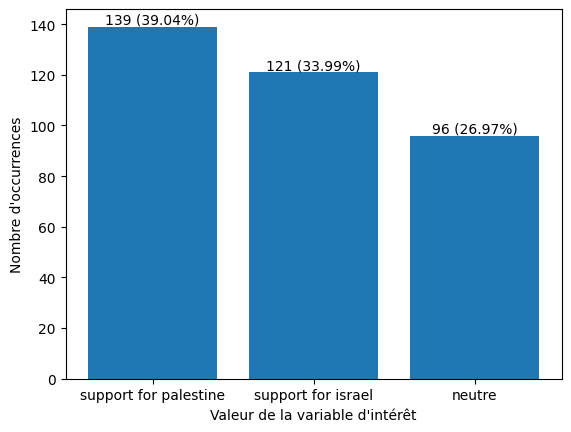

array(['support for palestine/gaza', 'support for israel', 'neutre'],
      dtype=object)

In [4]:
target_counts = df['category'].value_counts()

# Calculer la proportion pour chaque valeur de la variable d'intérêt (category)
target_proportions = df['category'].value_counts(normalize=True)

# Créer un graphique à barres pour visualiser la distribution
plt.bar(target_counts.index, target_counts.values)

# Ajouter les étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(target_counts):
    proportion = target_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiqueter l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajouter une légende aux barres
plt.xticks(target_counts.index, ['support for palestine', 'support for israel', 'neutre'])

# Afficher le graphique
plt.show()
df['category'].unique()

In [5]:
supportPALESTAINE_comments = df[df['category'] == 'support for palestine/gaza'].sample(n=69, random_state=42, replace=True)
supportISRAEL_comments = df[df['category'] == 'support for israel'].sample(n=60, random_state=42, replace=True)
Neutre_comments = df[df['category'] == 'neutre'].sample(n=40, random_state=42, replace=True)

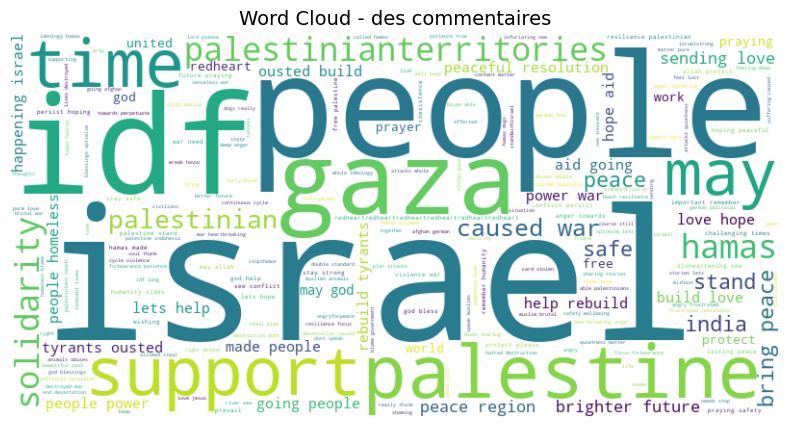

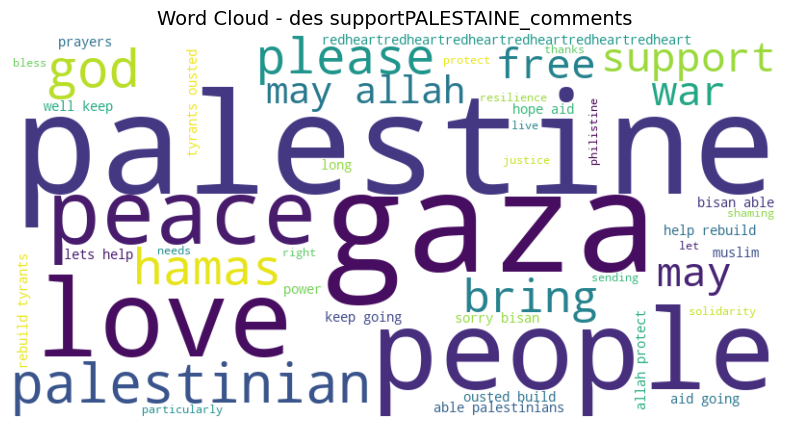

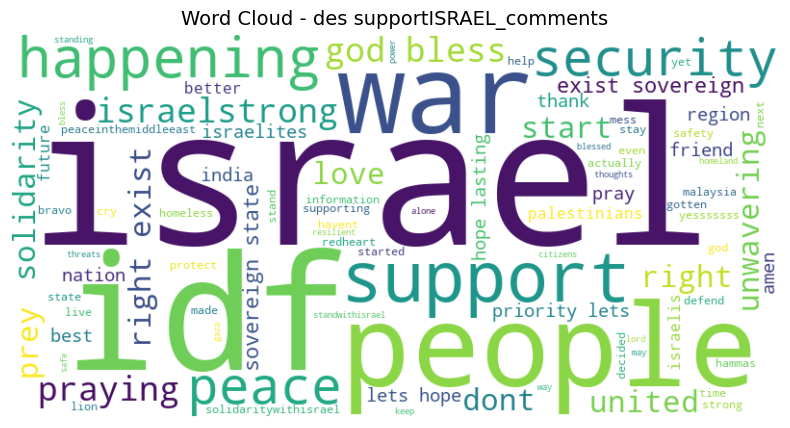

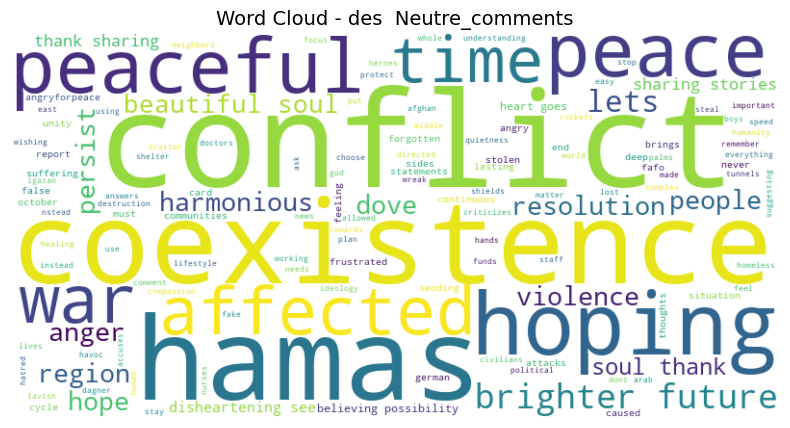

In [6]:

# Fonction pour générer le word cloud
def generer_wordcloud(comments, titre):
    tout_texte = ' '.join(comments)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

# Générer le word cloud pour chaque type de sentiment
generer_wordcloud(df['comment'], 'Word Cloud - des commentaires')
generer_wordcloud(supportPALESTAINE_comments['comment'], 'Word Cloud - des supportPALESTAINE_comments')
generer_wordcloud(supportISRAEL_comments['comment'], 'Word Cloud - des supportISRAEL_comments')
generer_wordcloud(Neutre_comments['comment'], 'Word Cloud - des  Neutre_comments')


<h2>pretraitement des donnees </h2>

Tokenisation La tokenisation consiste à diviser un texte en unités linguistiques plus petites appelées "tokens". Un token peut être un mot individuel, une ponctuation ou même une partie d'un mot, selon la façon dont le texte est analysé. La tokenisation est souvent réalisée en utilisant des techniques telles que la séparation par des espaces, la reconnaissance de motifs (regex) ou l'utilisation de modèles de langage.

Par exemple, pour la phrase "Le chat est sur le tapis.", la tokenisation peut produire les tokens suivants : ["Le", "chat", "est", "sur", "le", "tapis", "."]. Chaque mot et signe de ponctuation est extrait comme un token distinct.

In [7]:
import emoji

def encode_emojis(text):
    return emoji.demojize(text)

df['comment'] = df['comment'].apply(encode_emojis)

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Téléchargez la liste des mots vides si ce n'est pas déjà fait
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

def clean_text(text):
    if text is not None:
        # Supprimer les liens 
        text = re.sub(r'http\S+', '', text)
        # Supprimer les caractères spéciaux
        text = re.sub(r'[^A-Za-z\s]', '', text)

        # Supprimer la ponctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Tokenization
        tokens = word_tokenize(text)

        # Supprimer les mots vides
        stop_words = set(stopwords.words('english'))
        tokens = [word.lower() for word in tokens if word.lower() not in stop_words]

        # Supprimer les mots non significatifs 
        tokens = [word for word in tokens if len(word) > 2]

        # Recréer le texte à partir des mots filtrés
        text = ' '.join(tokens)

        # Supprimer les espaces multiples
        text = re.sub(r'\s+', ' ', text).strip()

    return text

# Appliquer la fonction de nettoyage à chaque commentaire dans la colonne 'comment'
df['comment'] = df['comment'].apply(clean_text)

# Afficher le DataFrame après le nettoyage
df


,Unnamed: 0.1,Unnamed: 0,comment,category
0,0,0.0,resilience palestinian people admirable palest...,support for palestine/gaza
1,1,1.0,may god protect palestine bring peace gaza pal...,support for palestine/gaza
2,2,2.0,every person gaza deserves peace prayers strug...,support for palestine/gaza
3,3,3.0,israel right defend protect citizens israel st...,support for israel
4,4,4.0,israels security priority lets hope lasting pe...,support for israel
...,...,...,...,...
351,351,NaN,situation middle east complex easy answers,neutre
352,352,NaN,world needs healing war anger directed choose ...,neutre
353,353,NaN,comment criticizes hamas suggesting use funds ...,neutre
354,354,NaN,times like lets focus understanding compassion,neutre


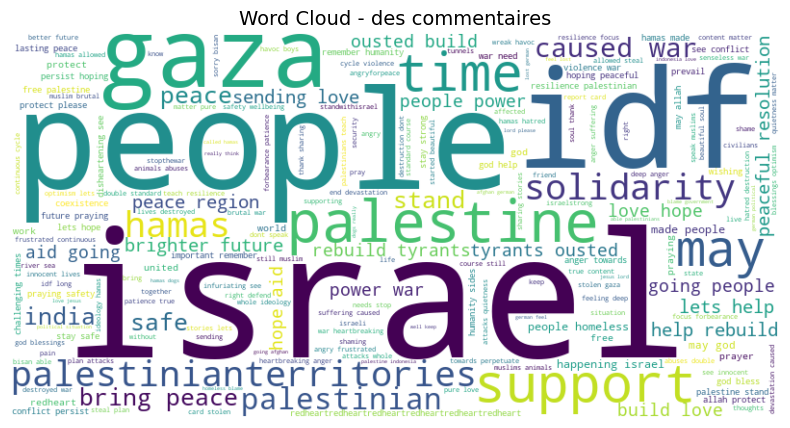

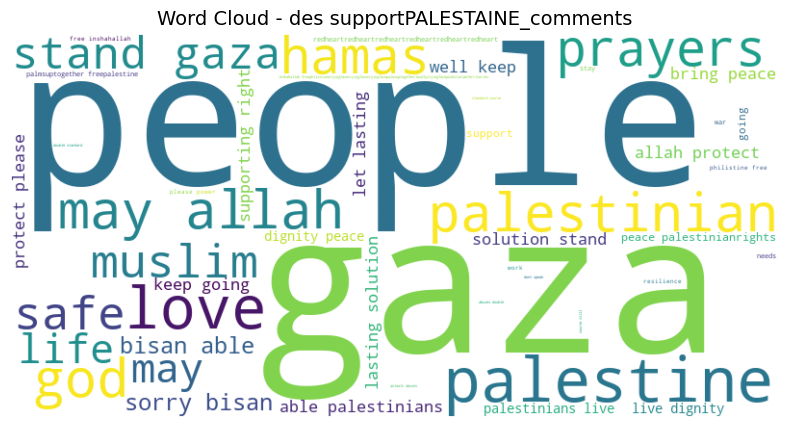

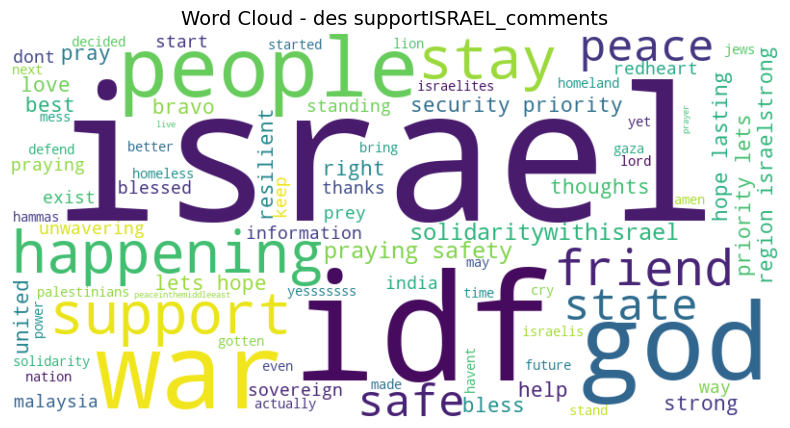

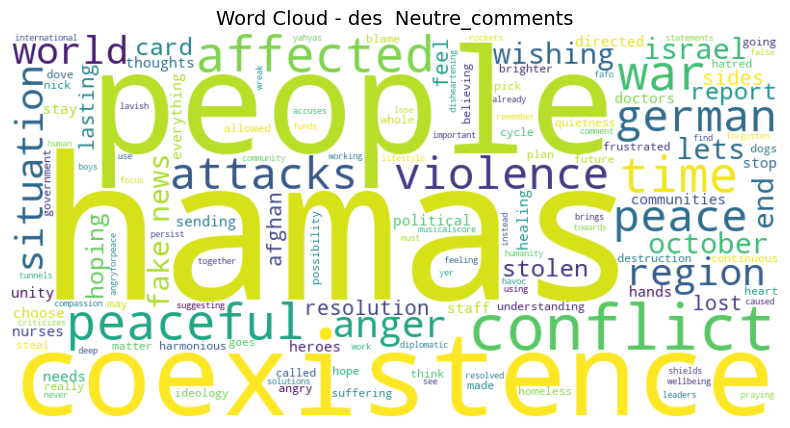

In [8]:
df1=pd.read_csv('training_dataset.csv')
supportPALESTAINE_comments = df1[df1['category'] == 'support for palestine/gaza'].sample(n=69, random_state=42, replace=True)
supportISRAEL_comments = df1[df1['category'] == 'support for israel'].sample(n=60, random_state=42, replace=True)
Neutre_comments = df1[df1['category'] == 'neutre'].sample(n=40, random_state=42, replace=True)
# Fonction pour générer le word cloud
def generer_wordcloud(comments, titre):
    tout_texte = ' '.join(comments)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

# Générer le word cloud pour chaque type de sentiment
generer_wordcloud(df['comment'], 'Word Cloud - des commentaires')
generer_wordcloud(supportPALESTAINE_comments['comment'], 'Word Cloud - des supportPALESTAINE_comments')
generer_wordcloud(supportISRAEL_comments['comment'], 'Word Cloud - des supportISRAEL_comments')
generer_wordcloud(Neutre_comments['comment'], 'Word Cloud - des  Neutre_comments')
